In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('eda_data.csv')
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [4]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,370.500000,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,214.341239,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,185.250000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,370.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,555.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


-----

In [5]:
# EDA

In [6]:
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [7]:
# Compter les 'na' par colonne
na_count = (df == 'na').sum()
print("Nombre de 'na' par colonne:")
print(na_count)

# Total de 'na'
total_na = (df == 'na').sum().sum()
print(f"\nTotal de 'na' dans le dataset: {total_na}")

# Colonnes qui contiennent des 'na'
colonnes_avec_na = na_count[na_count > 0]
if len(colonnes_avec_na) > 0:
    print("\nColonnes contenant des 'na':")
    print(colonnes_avec_na)

Nombre de 'na' par colonne:
Unnamed: 0             0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_txt            0
job_state              0
same_state             0
age                    0
python_yn              0
R_yn                   0
spark                  0
aws                    0
excel                  0
job_simp             184
seniority            520
desc_len               0
num_comp               0
dtype: int64

Total de 'na' dans le dataset: 704

Colonnes contenant des 'na':
job_simp     184
seniority    520
dtype: int64


In [8]:
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nPremières lignes:")
print(df.head())
print(f"\nTypes de données:")
df.dtypes

Dimensions: 742 lignes × 33 colonnes

Premières lignes:
   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuque

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

       min_salary  max_salary  avg_salary
count  742.000000  742.000000  742.000000
mean    74.719677  128.149596  100.626011
std     30.980593   45.220324   38.855948
min     15.000000   16.000000   13.500000
25%     52.000000   96.000000   73.500000
50%     69.500000  124.000000   97.500000
75%     91.000000  155.000000  122.500000
max    202.000000  306.000000  254.000000


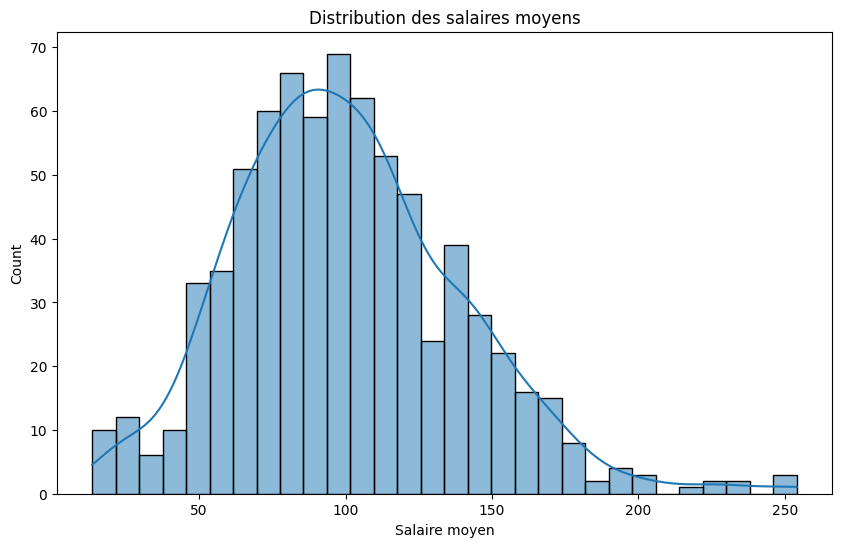

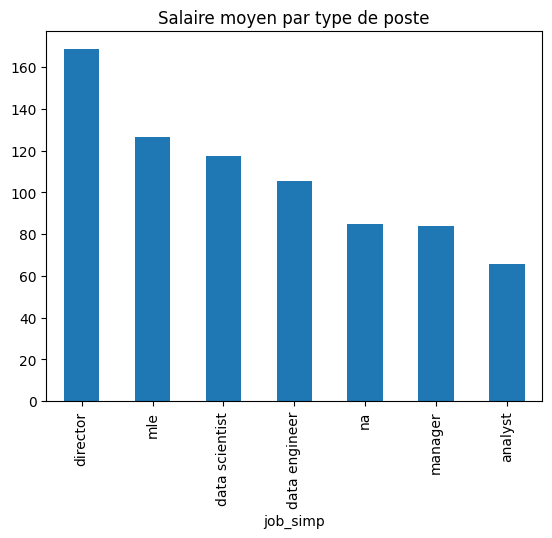

In [9]:
# Statistiques descriptives des salaires
print(df[['min_salary', 'max_salary', 'avg_salary']].describe())

# Distribution des salaires
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary'], bins=30, kde=True)
plt.title('Distribution des salaires moyens')
plt.xlabel('Salaire moyen')
plt.show()

# Salaires par type de job
df.groupby('job_simp')['avg_salary'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Salaire moyen par type de poste')
plt.show()

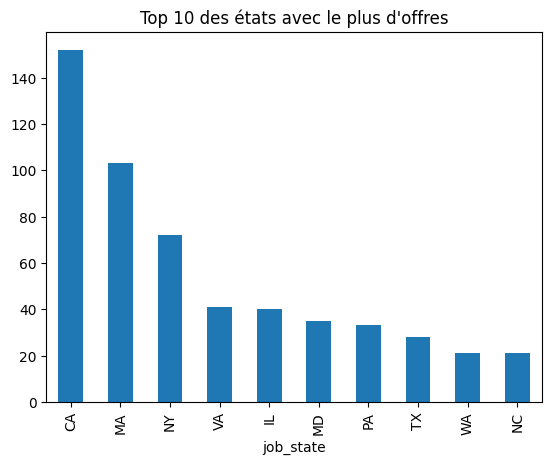

job_state
CA    123.513158
IL    116.662500
DC    110.181818
MA    106.281553
NJ    104.558824
MI    100.250000
RI    100.000000
NY     98.652778
NC     98.452381
MD     97.357143
Name: avg_salary, dtype: float64

In [10]:
# Top 10 des états avec le plus d'offres
df['job_state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des états avec le plus d\'offres')
plt.show()

# Salaire moyen par état
df.groupby('job_state')['avg_salary'].mean().sort_values(ascending=False).head(10)

In [11]:
# Demande de compétences
skills = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
skill_demand = df[skills].sum().sort_values(ascending=False)
print(skill_demand)

# Impact des compétences sur le salaire
for skill in skills:
    print(f"\nSalaire moyen avec {skill}:")
    print(df.groupby(skill)['avg_salary'].mean())

python_yn    392
excel        388
aws          176
spark        167
R_yn           2
dtype: int64

Salaire moyen avec python_yn:
python_yn
0     87.155714
1    112.653061
Name: avg_salary, dtype: float64

Salaire moyen avec R_yn:
R_yn
0    100.706757
1     70.750000
Name: avg_salary, dtype: float64

Salaire moyen avec spark:
spark
0     96.931304
1    113.347305
Name: avg_salary, dtype: float64

Salaire moyen avec aws:
aws
0     96.915194
1    112.559659
Name: avg_salary, dtype: float64

Salaire moyen avec excel:
excel
0    102.953390
1     98.502577
Name: avg_salary, dtype: float64


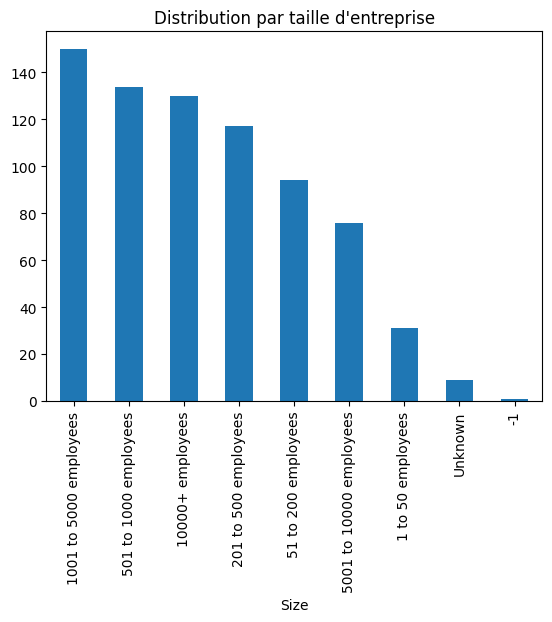

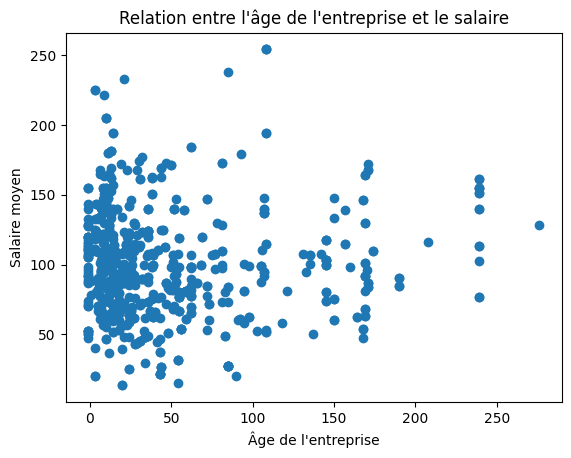

In [12]:
# Distribution des tailles d'entreprise
df['Size'].value_counts().plot(kind='bar')
plt.title('Distribution par taille d\'entreprise')
plt.show()

# Rating moyen par secteur
df.groupby('Sector')['Rating'].mean().sort_values(ascending=False).head(10)

# Âge des entreprises vs salaire
plt.scatter(df['age'], df['avg_salary'])
plt.xlabel('Âge de l\'entreprise')
plt.ylabel('Salaire moyen')
plt.title('Relation entre l\'âge de l\'entreprise et le salaire')
plt.show()

Valeurs 'na' par colonne:
job_simp     184
seniority    520
dtype: int64


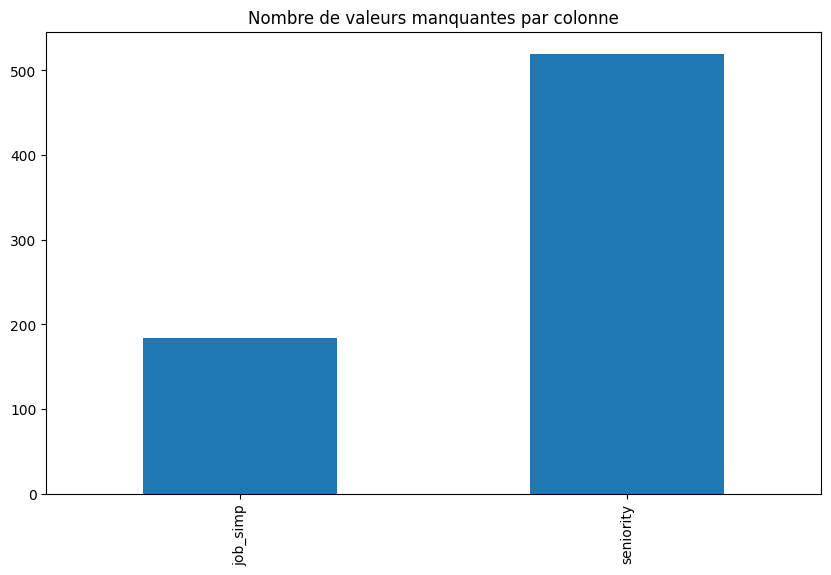

In [13]:
# Traiter les 'na'
na_count = (df == 'na').sum()
print("Valeurs 'na' par colonne:")
print(na_count[na_count > 0])

# Visualisation
plt.figure(figsize=(10, 6))
na_count[na_count > 0].plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.show()

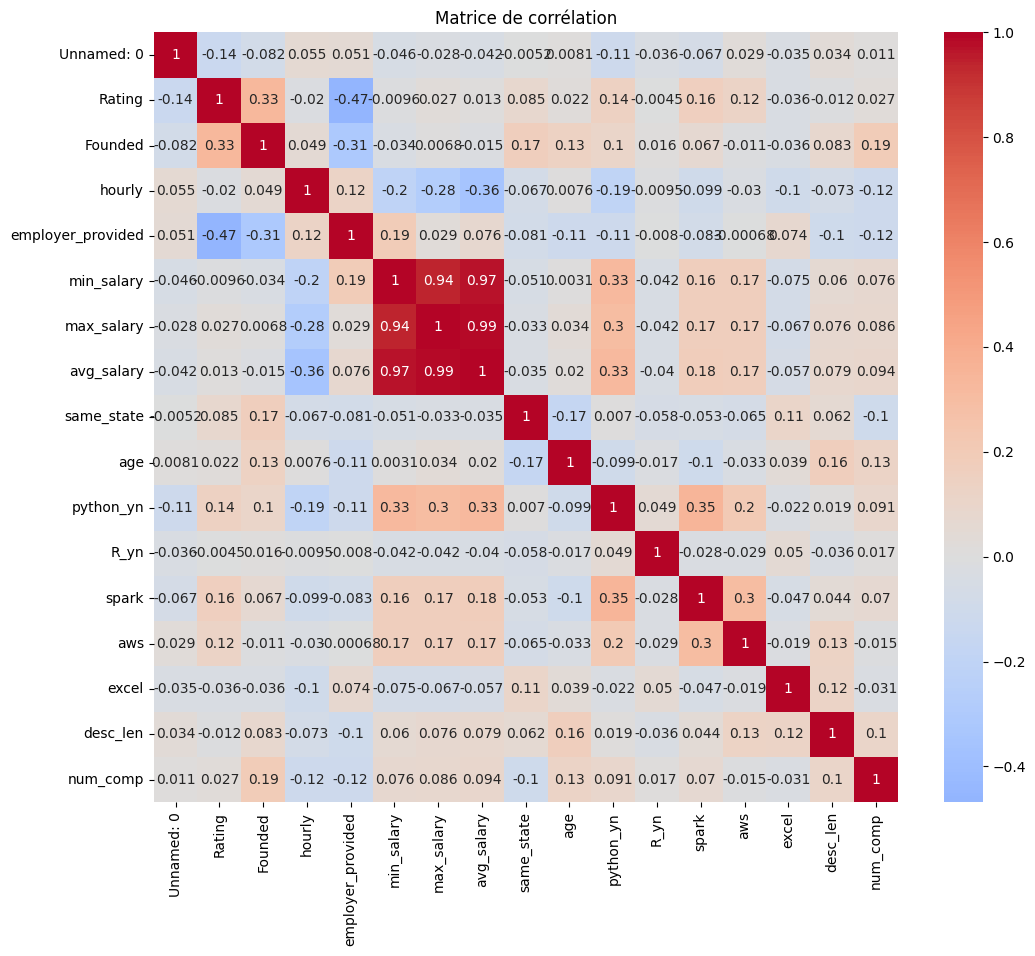

Corrélation avec le salaire moyen:
avg_salary           1.000000
max_salary           0.986862
min_salary           0.967765
python_yn            0.327796
spark                0.176559
aws                  0.171379
num_comp             0.093813
desc_len             0.078808
employer_provided    0.076287
age                  0.019655
Rating               0.013492
Founded             -0.015149
same_state          -0.034641
R_yn                -0.040000
Unnamed: 0          -0.041765
excel               -0.057252
hourly              -0.356082
Name: avg_salary, dtype: float64


In [14]:
# Matrice de corrélation pour les variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

# Corrélation avec le salaire
salary_corr = df[numeric_cols].corr()['avg_salary'].sort_values(ascending=False)
print("Corrélation avec le salaire moyen:")
print(salary_corr)

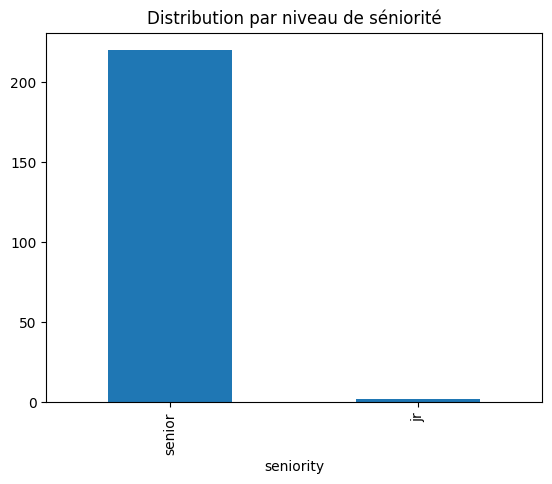

seniority
senior    121.563636
jr         81.500000
Name: avg_salary, dtype: float64

In [15]:
# Distribution par niveau de séniorité
df[df['seniority'] != 'na']['seniority'].value_counts().plot(kind='bar')
plt.title('Distribution par niveau de séniorité')
plt.show()

# Salaire par séniorité
df[df['seniority'] != 'na'].groupby('seniority')['avg_salary'].mean().sort_values(ascending=False)

<Axes: xlabel='Size', ylabel='avg_salary'>

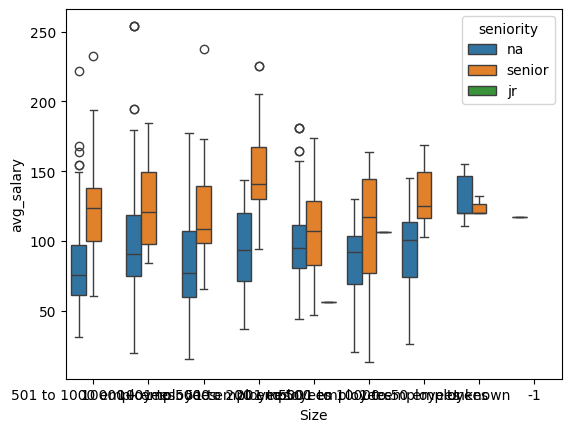

In [16]:
# Salaire par combinaison de compétences
df_skills = df.groupby(['python_yn', 'spark', 'aws'])['avg_salary'].mean()

# Interaction taille entreprise × séniorité × salaire
sns.boxplot(data=df, x='Size', y='avg_salary', hue='seniority')

In [17]:
# Impact du nombre de compétiteurs sur le salaire
df.groupby('num_comp')['avg_salary'].agg(['mean', 'count'])

,mean,count
num_comp,,
0,97.602174,460
1,106.208333,12
2,106.865854,41
3,105.504386,228
4,56.500000,1


<Axes: ylabel='avg_salary'>

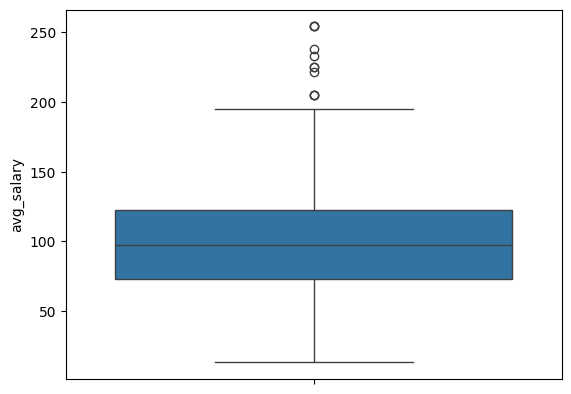

In [66]:
import seaborn as sns
sns.boxplot(df['avg_salary'])


In [67]:
Q1 = df['avg_salary'].quantile(0.25)
Q3 = df['avg_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

0.0 196.0


In [ ]:
df_clean = df[(df['avg_salary'] >= lower_bound) & (df['avg_salary'] <= upper_bound)]

In [ ]:
print("Avant:", df.shape)
print("Après :", df_clean.shape)

Avant: (742, 22)
Après : (731, 22)


In [20]:
# Analyse des postes les mieux payés
top_jobs = df.nlargest(20, 'avg_salary')

In [21]:
top_jobs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
354,354,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,...,108,1,0,0,0,0,director,na,4471,3
528,528,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,...,108,1,0,0,0,0,director,na,4471,3
708,708,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912,...,108,1,0,0,0,0,director,na,4471,3
103,103,Senior Data Scientist,$200K-$275K(Employer est.),Who we want:\nAre you committed to using your ...,4.2,Gallup\n4.2,"Washington, DC","Washington, DC",1001 to 5000 employees,1935,...,85,1,0,0,0,1,data scientist,senior,3301,3
429,429,Principal Machine Learning Scientist,$176K-$289K (Glassdoor est.),"Today, nearly every business in the world has ...",4.7,Sage Intacct\n4.7,"San Francisco, CA","San Jose, CA",501 to 1000 employees,1999,...,21,1,0,0,0,0,mle,senior,3855,0
176,176,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,...,3,1,0,0,1,1,data scientist,senior,1632,0
266,266,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,...,3,1,0,0,1,1,data scientist,senior,1632,0
613,613,Data Science Manager,$171K-$272K (Glassdoor est.),About us:\nGrand Rounds is a new kind of healt...,4.2,Grand Rounds\n4.2,"San Francisco, CA","San Francisco, CA",501 to 1000 employees,2011,...,9,1,0,0,0,1,manager,na,4951,0
195,195,Lead Data Engineer,$190K-$220K(Employer est.),Credit Sesame is bringing cash and credit toge...,4.1,Credit Sesame\n4.1,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,...,10,1,0,1,1,0,data engineer,senior,4037,3
330,330,Lead Data Engineer,$190K-$220K(Employer est.),Credit Sesame is bringing cash and credit toge...,4.1,Credit Sesame\n4.1,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2010,...,10,1,0,1,1,0,data engineer,senior,4037,3


In [22]:
# DIAGRAMME DE SANKEY

# Filtrer pour avoir les top états, secteurs et jobs
df_sankey = df[(df['job_simp'] != 'na') & (df['Sector'] != 'Unknown / Non-Applicable')].copy()

# Sélectionner les top 8 états, 8 secteurs, et 6 types de jobs
top_states = df_sankey['job_state'].value_counts().head(8).index
top_sectors = df_sankey['Sector'].value_counts().head(8).index
top_jobs = df_sankey['job_simp'].value_counts().head(6).index

df_sankey_filtered = df_sankey[
    (df_sankey['job_state'].isin(top_states)) &
    (df_sankey['Sector'].isin(top_sectors)) &
    (df_sankey['job_simp'].isin(top_jobs))
]

In [23]:
df_sankey_filtered.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,...,15,1,0,1,1,1,data scientist,na,3804,0
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,...,11,1,0,1,0,0,data scientist,na,4574,2
11,11,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,52,0,0,0,0,0,data scientist,na,3490,0
13,13,Data Analyst,$46K-$85K (Glassdoor est.),"Are you an experienced Data Analyst, skilled a...",4.1,Yesler\n4.1,"Seattle, WA","Seattle, WA",201 to 500 employees,2012,...,8,1,0,1,1,1,analyst,na,4897,0


# CLeaning on the dataset

In [24]:
# Drop useless columns
cols_to_drop = [
    "Unnamed: 0",          # only an index column created during CSV export
    "Salary Estimate",      # raw messy text like "$90K-$120K" we already have min/max/avg extracted
    "min_salary",           # redundant since target is avg_salary
    "max_salary",           # same reason
    "hourly",               # binary flag for hourly jobs, irrelevant/noisy for avg salary prediction
    "employer_provided",    # too sparse / not useful for salary inference
    "Company Name",         # we keep company_txt (cleaned version), so raw version is redundant
    "Competitors",          # messy text list, inconsistent, too noisy for prediction
    "Headquarters",         # redundant with Location and job_state, adds no predictive value
    "same_state",           # artificially engineered feature, not needed
    "num_comp",             # number of competitors extracted from messy text == low quality feature
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [25]:
# clean job dedscription bc the names are ugly bc of the scrapping
df["Job Description"] = (
    df["Job Description"]
        .str.replace('\n', ' ', regex=True)
        .str.replace('\r', ' ', regex=True)
        .str.replace('\xa0', ' ', regex=True)
        .str.replace('–', '-', regex=True)
        .str.strip()
)

In [26]:
# converting the size column to have range instead of strings 
df["size_min_employees"] = df["Size"].str.extract(r"(\d+)").astype(float)

df["size_max_employees"] = df["Size"].str.extract(r"to (\d+)")
df.loc[df["Size"].str.contains("\+"), "size_max_employees"] = df["size_min_employees"]  # handle "10000+ employees"

df["size_max_employees"] = df["size_max_employees"].astype(float)

df = df.drop(columns=["Size"])

<>:5: SyntaxWarning: invalid escape sequence '\+'
<>:5: SyntaxWarning: invalid escape sequence '\+'
C:\Users\33619\AppData\Local\Temp\ipykernel_6696\2561160025.py:5: SyntaxWarning: invalid escape sequence '\+'
  df.loc[df["Size"].str.contains("\+"), "size_max_employees"] = df["size_min_employees"]  # handle "10000+ employees"


In [27]:
# clean founded column
df["Founded"] = df["Founded"].replace({0: np.nan})

In [28]:
# extarct job state from location 
# df["job_state"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())

In [29]:
categorical_cols = ["Type of ownership", "Industry", "Sector", "Revenue"]

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

In [30]:
df.sample(3)

,Job Title,Job Description,Rating,Location,Founded,Type of ownership,Industry,Sector,Revenue,avg_salary,...,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,size_min_employees,size_max_employees
195,Lead Data Engineer,Credit Sesame is bringing cash and credit toge...,4.1,"Mountain View, CA",2010,Company - Private,Internet,Information Technology,$50 to $100 million (USD),205.0,...,1,0,1,1,0,data engineer,senior,4037,51.0,200.0
700,Data Scientist,DatamanUSA has an exciting opportunity for a D...,3.4,"Olympia, WA",-1,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),89.0,...,0,0,0,0,0,data scientist,na,407,51.0,200.0
290,Staff Scientist,Position Description A staff scientist serves...,4.4,"Columbia, SC",1929,Company - Private,Architectural & Engineering Services,Business Services,$25 to $50 million (USD),60.5,...,0,0,0,0,0,na,na,1934,201.0,500.0


In [31]:
df.columns.tolist()

['Job Title',
 'Job Description',
 'Rating',
 'Location',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'avg_salary',
 'company_txt',
 'job_state',
 'age',
 'python_yn',
 'R_yn',
 'spark',
 'aws',
 'excel',
 'job_simp',
 'seniority',
 'desc_len',
 'size_min_employees',
 'size_max_employees']

In [32]:
df['Location'].head()

0    Albuquerque, NM
1      Linthicum, MD
2     Clearwater, FL
3       Richland, WA
4       New York, NY
Name: Location, dtype: object

In [33]:
df['job_state'].head()

0    NM
1    MD
2    FL
3    WA
4    NY
Name: job_state, dtype: object

In [34]:
# Useless to keep both location and job_state
df = df.drop(columns=["job_state"])

In [35]:
df.columns.tolist()


['Job Title',
 'Job Description',
 'Rating',
 'Location',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'avg_salary',
 'company_txt',
 'age',
 'python_yn',
 'R_yn',
 'spark',
 'aws',
 'excel',
 'job_simp',
 'seniority',
 'desc_len',
 'size_min_employees',
 'size_max_employees']

In [70]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("avg_salary", axis=1)
y = df_clean["avg_salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Encoding 

In [71]:
numeric_features = [
    'Rating',
    'Founded',
    'age',
    'size_min_employees',
    'size_max_employees',
    'desc_len'
]

categorical_features = [
    'Job Title',
    'Location',
    'Type of ownership',
    'Industry',
    'Sector',
    'Revenue',
    'company_txt',
    'job_simp',
    'seniority'
]

# binary_features = []
binary_features = [
    'python_yn',
    'R_yn',
    'spark',
    'aws',
    'excel'
]

text_feature = 'Job Description'


In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[

        # 1. Numeric columns: impute mean + scale
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),

        # 2. Categorical columns: impute + one hot
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),

        # 3. Text column: give directly to TF-IDF (no pipeline!)
        ('text_tfidf', TfidfVectorizer(max_features=300), text_feature),

        # 4. Binary features: impute (if needed) then pass
        ('binary', SimpleImputer(strategy='constant', fill_value=0), binary_features)
    ],
    remainder='drop'
)


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def evaluate_model(model, model_name):

    # --- Fit the model ---
    model.fit(X_train, y_train)

    # --- Predictions ---
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # --- Metrics ---
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # --- Cross Validation (5 folds) ---
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # --- Print results ---
    print(f"--- {model_name} ---")
    print(f" Train R² : {train_r2:.3f} | RMSE: {train_rmse:.1f} | MAE: {train_mae:.1f}")
    print(f" Test  R² : {test_r2:.3f} | RMSE: {test_rmse:.1f} | MAE: {test_mae:.1f}")
    print(f" CV R² mean: {cv_mean:.3f} ± {cv_std:.3f}")
    print("\n")

    # --- Graph setup ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Perfect prediction line
    max_val = max(y_train.max(), y_test.max())
    min_val = min(y_train.min(), y_test.min())
    line = np.linspace(min_val, max_val, 100)

    # ----- Train plot -----
    axes[0].scatter(y_train, y_pred_train, alpha=0.6)
    axes[0].plot(line, line, '--r')
    axes[0].set_title("Train Set")
    axes[0].set_xlabel("Valeurs Réelles (Actual)")
    axes[0].set_ylabel("Prédictions (Predicted)")

    # ----- Test plot -----
    axes[1].scatter(y_test, y_pred_test, alpha=0.6)
    axes[1].plot(line, line, '--r')
    axes[1].set_title("Test Set")
    axes[1].set_xlabel("Valeurs Réelles (Actual)")
    axes[1].set_ylabel("Prédictions (Predicted)")

    fig.suptitle(f"{model_name} – Comparaison des Prédictions", fontsize=16)
    plt.tight_layout()
    plt.show()


In [74]:
def evaluate_regression(model, name):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test, y_pred_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test  = mean_absolute_error(y_test, y_pred_test)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    
    return {
        "Model": name,
        "R2_train": r2_train,
        "R2_test": r2_test,
        "RMSE_train": rmse_train,
        "RMSE_test": rmse_test,
        "MAE_train": mae_train,
        "MAE_test": mae_test,
        "CV_R2_mean": cv_scores.mean(),
        "CV_R2_std": cv_scores.std()
    }


In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Pipeline for all models: 

In [76]:
dt_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=12, random_state=42))
])


In [77]:
rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300, max_depth=20, random_state=42, n_jobs=-1
    ))
])


In [78]:
gb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ))
])


In [79]:
xgb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1,
        random_state=42
    ))
])


In [80]:
lgb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", LGBMRegressor(
        n_estimators=400,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    ))
])


In [81]:
elastic_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
])


Training Decision Tree...
--- Decision Tree ---
 Train R² : 0.982 | RMSE: 4.9 | MAE: 1.4
 Test  R² : 0.713 | RMSE: 18.4 | MAE: 9.9
 CV R² mean: 0.321 ± 0.141




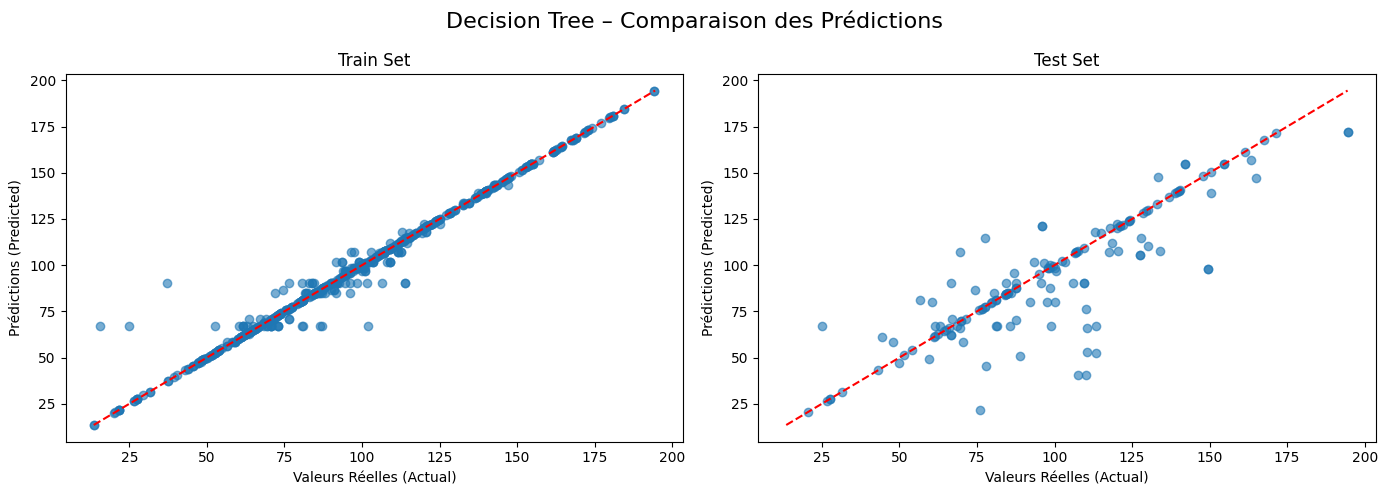

Training Random Forest...
--- Random Forest ---
 Train R² : 0.958 | RMSE: 7.3 | MAE: 4.9
 Test  R² : 0.733 | RMSE: 17.7 | MAE: 11.4
 CV R² mean: 0.615 ± 0.053




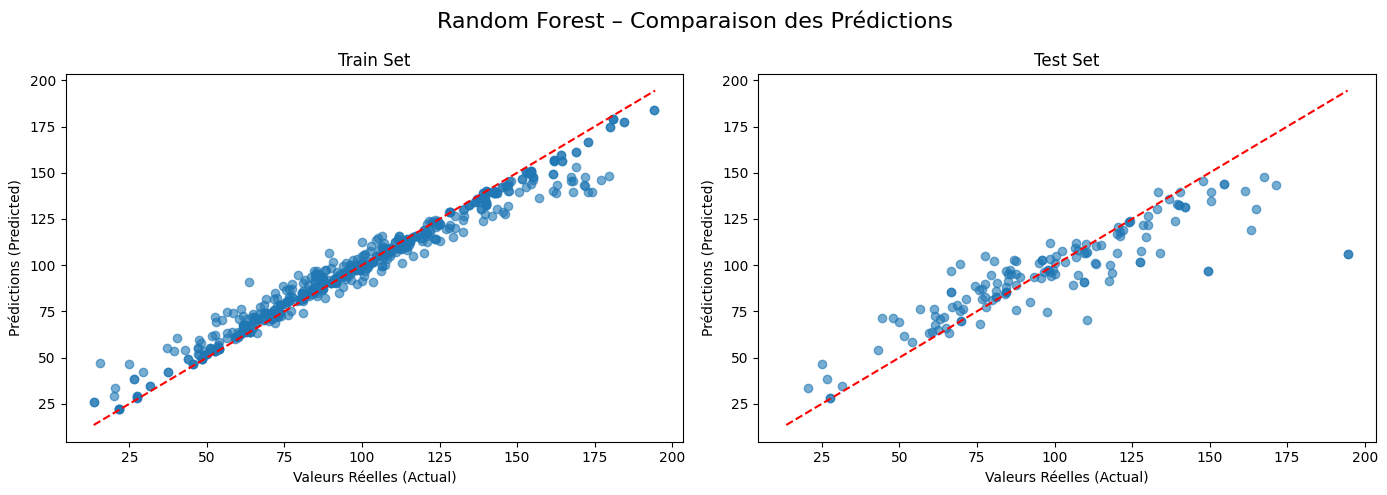

Training Gradient Boosting...
--- Gradient Boosting ---
 Train R² : 0.959 | RMSE: 7.3 | MAE: 5.9
 Test  R² : 0.757 | RMSE: 16.9 | MAE: 11.0
 CV R² mean: 0.655 ± 0.052




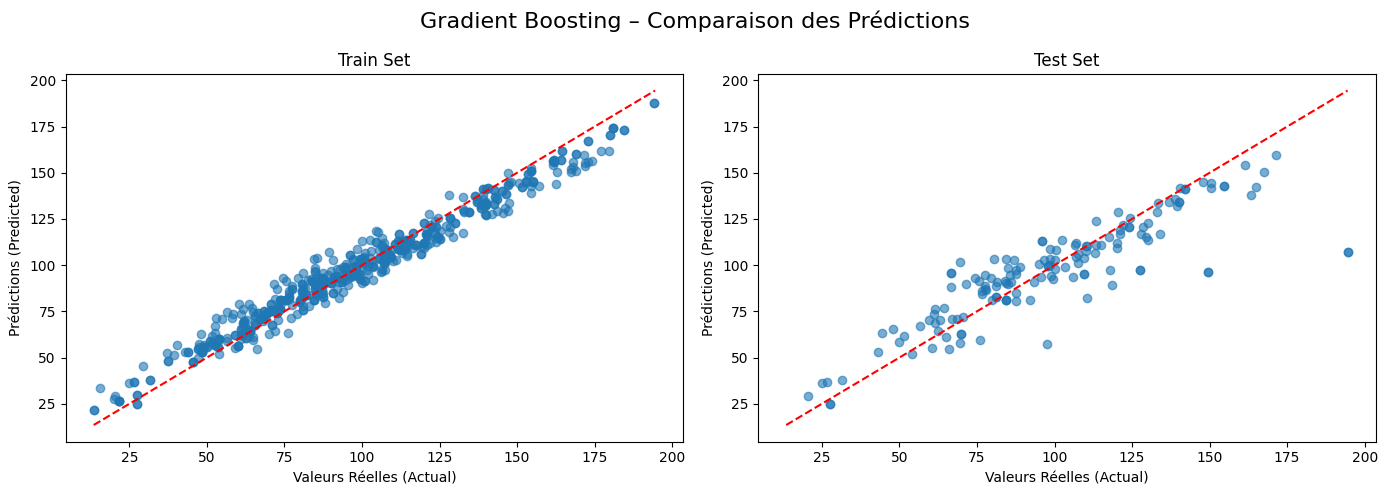

Training XGBoost...
--- XGBoost ---
 Train R² : 1.000 | RMSE: 0.2 | MAE: 0.1
 Test  R² : 0.755 | RMSE: 17.0 | MAE: 7.6
 CV R² mean: 0.652 ± 0.043




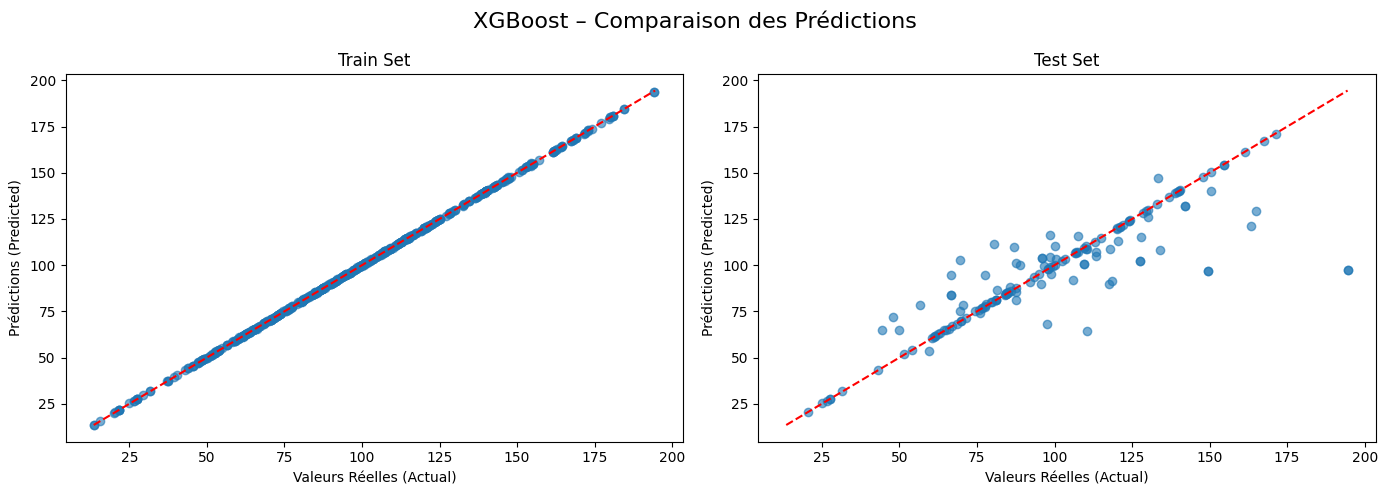

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21946
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 353
[LightGBM] [Info] Start training from score 98.731164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17972
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.775161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17948
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 349
[LightGBM] [Info] Start training from score 99.239829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17976
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 99.472163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17815
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.886510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18019
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 347
[LightGBM] [Info] Start training from score 99.280983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21946
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 353
[LightGBM] [Info] Start training from score 98.731164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17972
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.775161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17948
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 349
[LightGBM] [Info] Start training from score 99.239829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17976
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 99.472163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17815
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.886510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18019
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 347
[LightGBM] [Info] Start training from score 99.280983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- LightGBM ---
 Train R² : 0.997 | RMSE: 2.0 | MAE: 0.4
 Test  R² : 0.781 | RMSE: 16.0 | MAE: 7.4
 CV R² mean: 0.659 ± 0.070




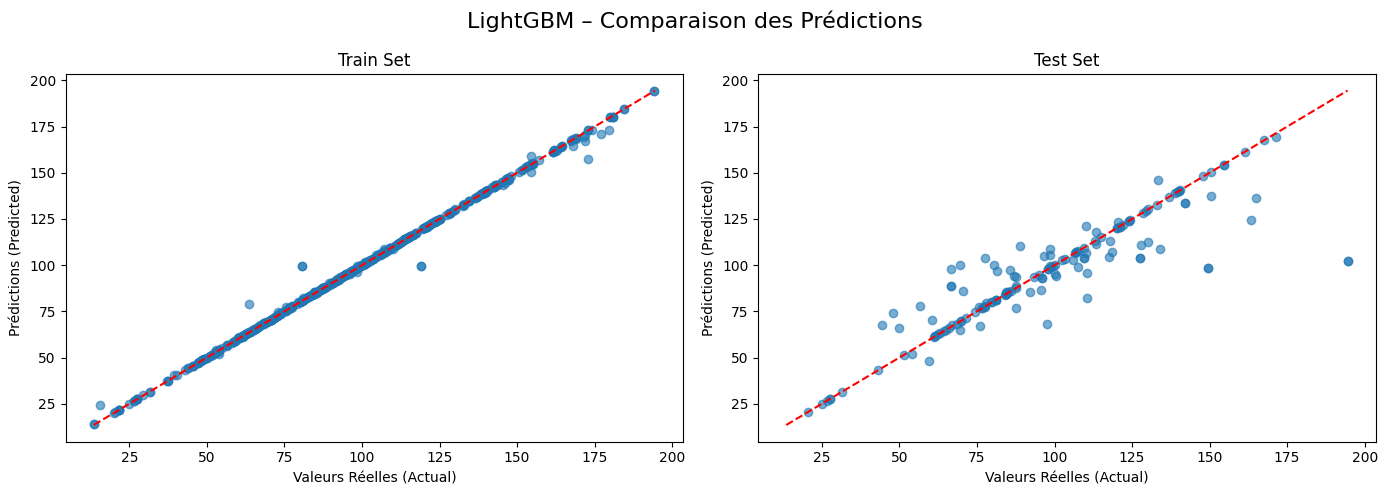

Training ElasticNet...
--- ElasticNet ---
 Train R² : 0.604 | RMSE: 22.7 | MAE: 18.2
 Test  R² : 0.529 | RMSE: 23.5 | MAE: 17.8
 CV R² mean: 0.495 ± 0.048




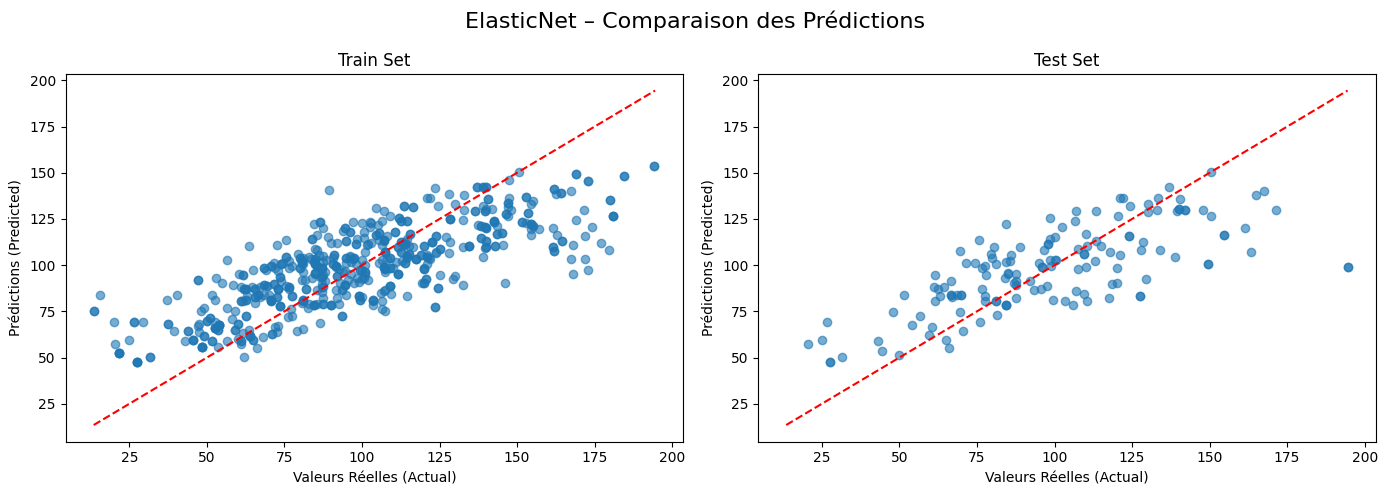

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test,CV_R2_mean,CV_R2_std
0,Decision Tree,0.981530,0.713484,4.896920,18.356637,1.358286,9.935569,0.321332,0.140718
1,Random Forest,0.958448,0.733193,7.344882,17.714008,4.875178,11.401643,0.615296,0.052571
2,Gradient Boosting,0.959237,0.756763,7.274776,16.913492,5.897065,11.030084,0.655401,0.051808
3,XGBoost,0.999982,0.754802,0.154941,16.981546,0.108592,7.553037,0.652303,0.042635
4,LightGBM,0.997015,0.781052,1.968678,16.046809,0.404665,7.437284,0.658812,0.070481
5,ElasticNet,0.604389,0.529491,22.663276,23.523543,18.153254,17.776187,0.495056,0.047901


In [82]:
models = [
    (dt_model, "Decision Tree"),
    (rf_model, "Random Forest"),
    (gb_model, "Gradient Boosting"),
    (xgb_model, "XGBoost"),
    (lgb_model, "LightGBM"),
    (elastic_model, "ElasticNet")
]

results = []

for model, name in models:
    print(f"Training {name}...")
    res = evaluate_regression(model, name)
    evaluate_model(model, name)
    results.append(res)

result_df = pd.DataFrame(results)
result_df.sort_values(by="R2_test", ascending=False)
result_df

In [128]:
# les models overfit pas mal au vu des scores r2 entre train et test
# je supp les colonnes binaires car elles apportent pas bcp d'infos et elles polluent le dataset
# ca change pas grand chose aux perf des models du coup je vais simplement les garder et jouer avec les hyperparametre des modeles pour essayer de reduire l'overfit

In [83]:
# MODELES AVEC HYPERPARAMÈTRES AMÉLIORÉS

dt_model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_leaf=10,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=2,
    random_state=42
)

lgb_model = LGBMRegressor(
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=2,
    random_state=42
)

elastic_model = ElasticNet(
    alpha=0.1,
    l1_ratio=0.5,
    random_state=42
)


In [84]:
preprocessor = ColumnTransformer(
    transformers=[

        # 1. Numeric columns: impute mean + scale
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),

        # 2. Categorical columns: impute + one hot
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features),

        # 3. Text column: give directly to TF-IDF (no pipeline!)
        ('text_tfidf', TfidfVectorizer(max_features=300), text_feature),

        # 4. Binary features: impute (if needed) then pass
        ('binary', SimpleImputer(strategy='constant', fill_value=0), binary_features)
    ],
    remainder='drop'
)


In [85]:
dt_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=12, random_state=42))
])

rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300, max_depth=20, random_state=42, n_jobs=-1
    ))
])

gb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ))
])

xgb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1,
        random_state=42
    ))
])

lgb_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", LGBMRegressor(
        n_estimators=400,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    ))
])


elastic_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
])



Training Decision Tree...
--- Decision Tree ---
 Train R² : 0.982 | RMSE: 4.9 | MAE: 1.4
 Test  R² : 0.713 | RMSE: 18.4 | MAE: 9.9
 CV R² mean: 0.321 ± 0.141




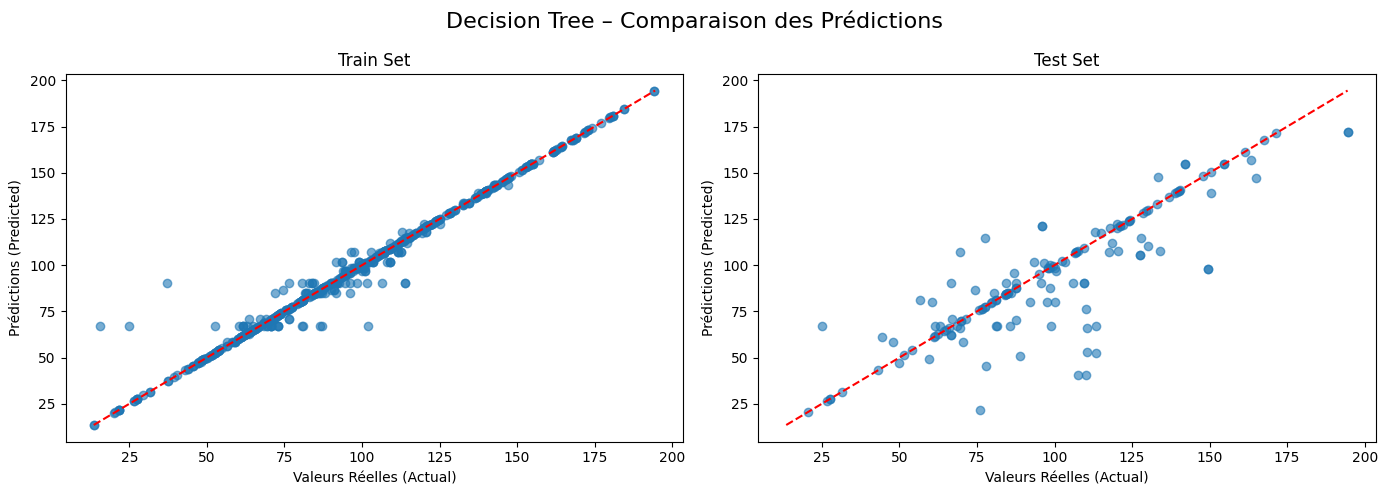


Training Random Forest...
--- Random Forest ---
 Train R² : 0.958 | RMSE: 7.3 | MAE: 4.9
 Test  R² : 0.733 | RMSE: 17.7 | MAE: 11.4
 CV R² mean: 0.615 ± 0.053




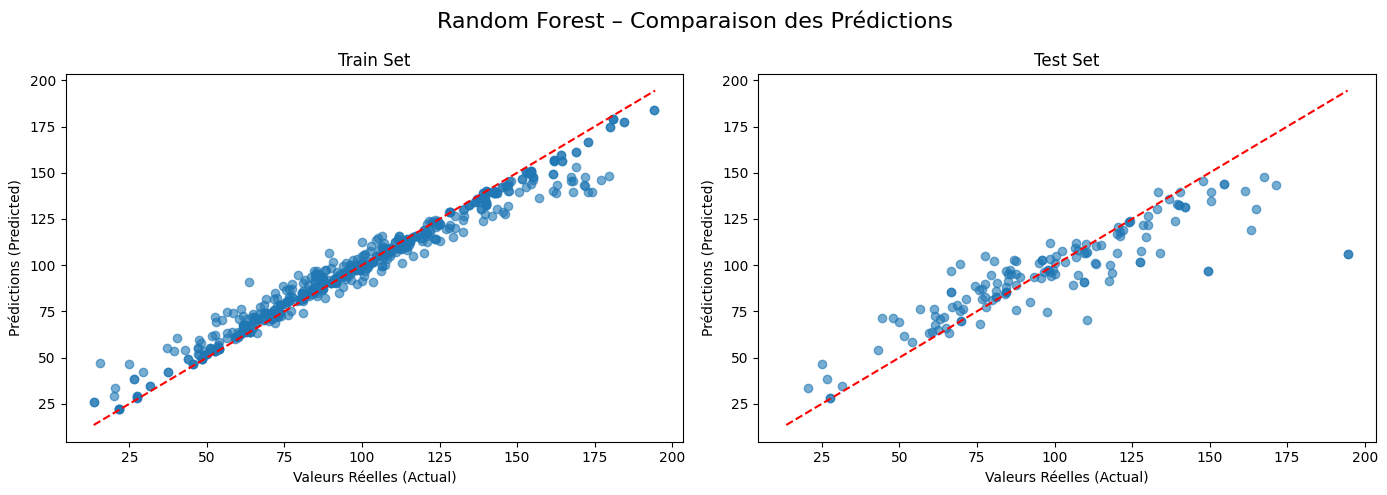


Training Gradient Boosting...
--- Gradient Boosting ---
 Train R² : 0.959 | RMSE: 7.3 | MAE: 5.9
 Test  R² : 0.757 | RMSE: 16.9 | MAE: 11.0
 CV R² mean: 0.655 ± 0.052




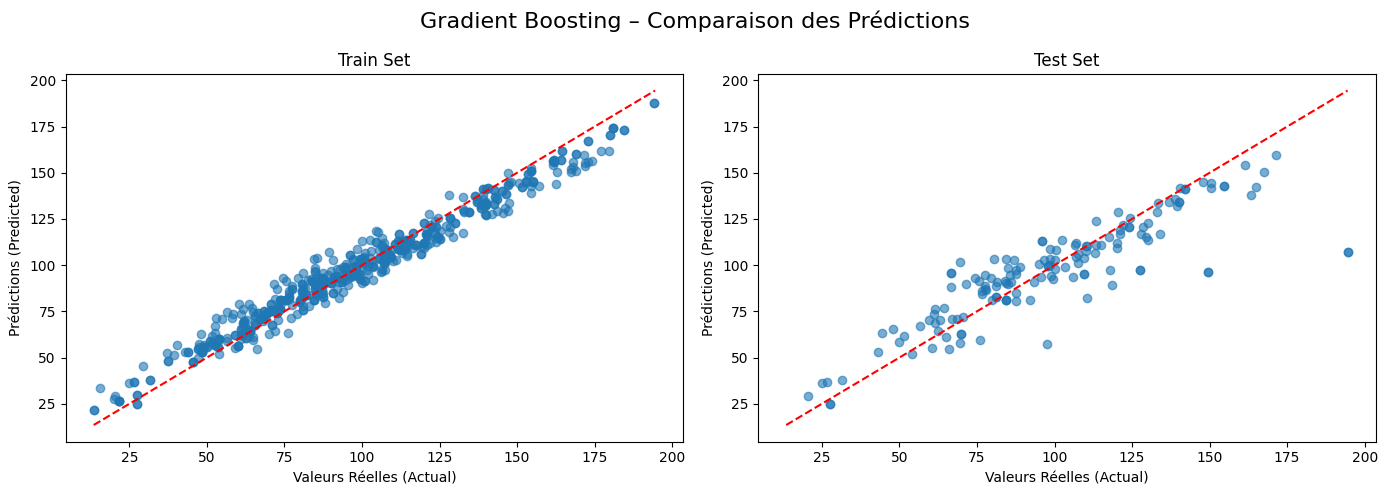


Training XGBoost...
--- XGBoost ---
 Train R² : 1.000 | RMSE: 0.2 | MAE: 0.1
 Test  R² : 0.755 | RMSE: 17.0 | MAE: 7.6
 CV R² mean: 0.652 ± 0.043




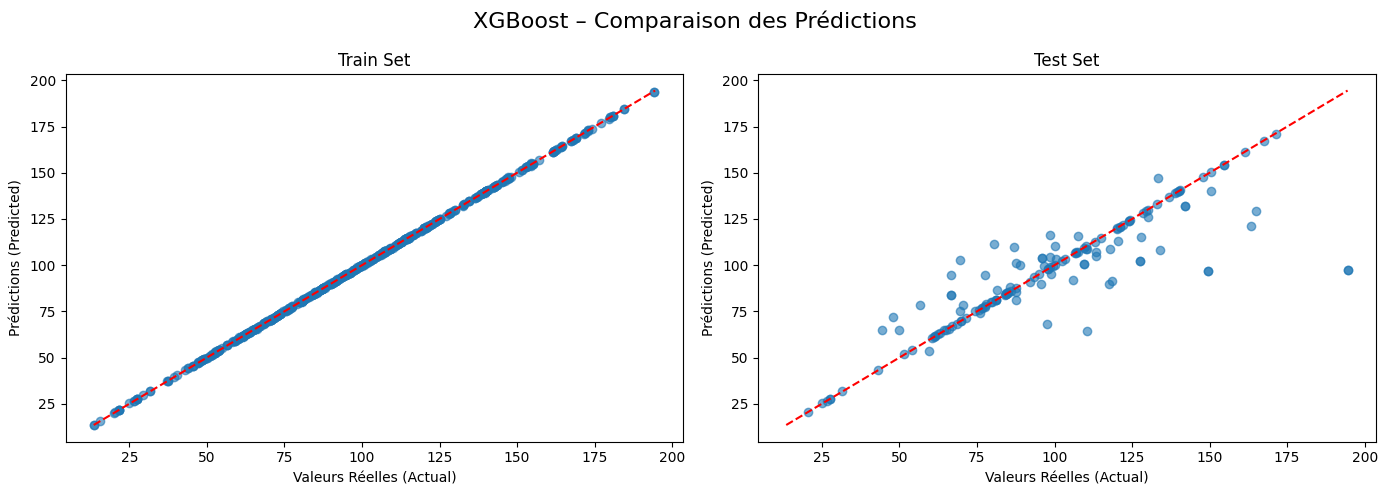


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21946
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 353
[LightGBM] [Info] Start training from score 98.731164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17972
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.775161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17948
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 349
[LightGBM] [Info] Start training from score 99.239829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17976
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 99.472163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17815
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.886510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18019
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 347
[LightGBM] [Info] Start training from score 99.280983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21946
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 353
[LightGBM] [Info] Start training from score 98.731164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17972
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.775161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17948
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 349
[LightGBM] [Info] Start training from score 99.239829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17976
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 99.472163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17815
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 348
[LightGBM] [Info] Start training from score 97.886510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18019
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 347
[LightGBM] [Info] Start training from score 99.280983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

c:\Users\33619\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


--- LightGBM ---
 Train R² : 0.997 | RMSE: 2.0 | MAE: 0.4
 Test  R² : 0.781 | RMSE: 16.0 | MAE: 7.4
 CV R² mean: 0.659 ± 0.070




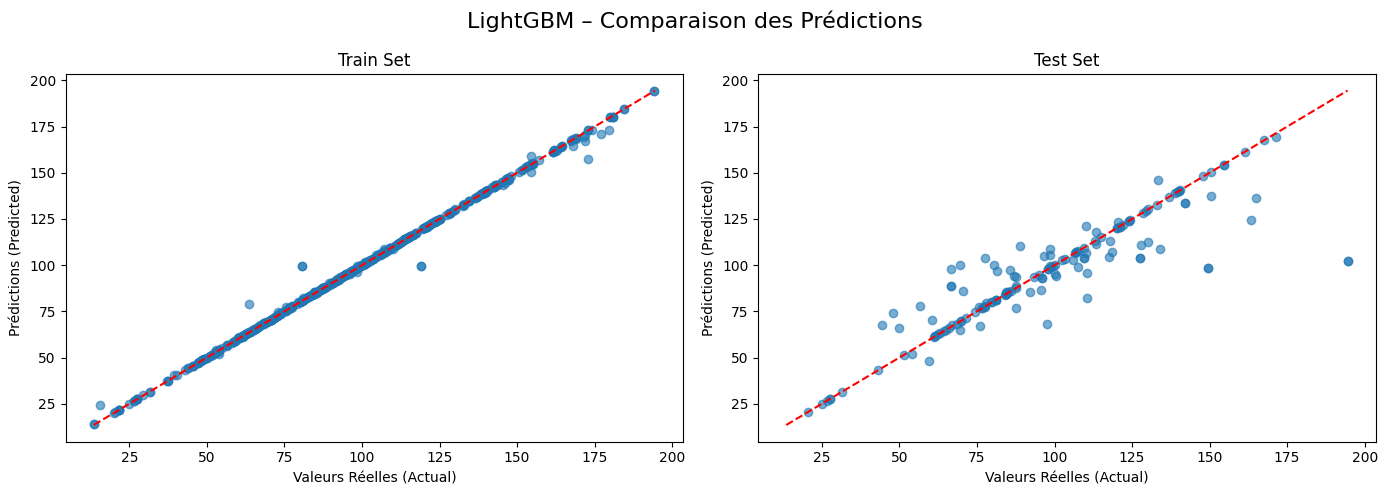


Training ElasticNet...
--- ElasticNet ---
 Train R² : 0.604 | RMSE: 22.7 | MAE: 18.2
 Test  R² : 0.529 | RMSE: 23.5 | MAE: 17.8
 CV R² mean: 0.495 ± 0.048




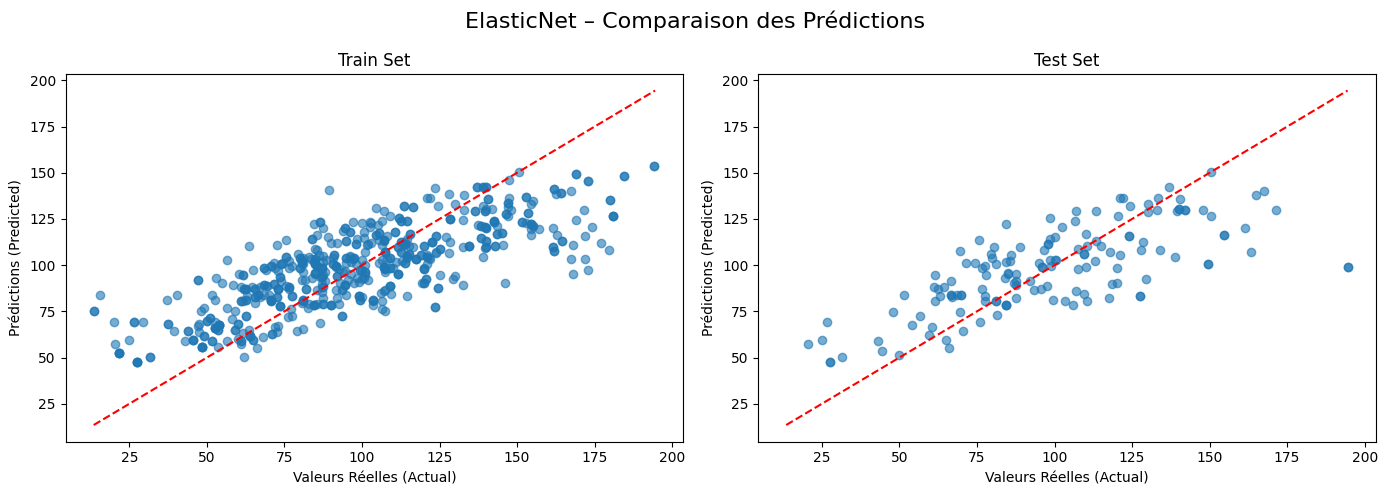

,Model,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test,CV_R2_mean,CV_R2_std
4,LightGBM,0.997015,0.781052,1.968678,16.046809,0.404665,7.437284,0.658812,0.070481
2,Gradient Boosting,0.959237,0.756763,7.274776,16.913492,5.897065,11.030084,0.655401,0.051808
3,XGBoost,0.999982,0.754802,0.154941,16.981546,0.108592,7.553037,0.652303,0.042635
1,Random Forest,0.958448,0.733193,7.344882,17.714008,4.875178,11.401643,0.615296,0.052571
0,Decision Tree,0.981530,0.713484,4.896920,18.356637,1.358286,9.935569,0.321332,0.140718
5,ElasticNet,0.604389,0.529491,22.663276,23.523543,18.153254,17.776187,0.495056,0.047901


In [86]:
models = [
    (dt_model, "Decision Tree"),
    (rf_model, "Random Forest"),
    (gb_model, "Gradient Boosting"),
    (xgb_model, "XGBoost"),
    (lgb_model, "LightGBM"),
    (elastic_model, "ElasticNet"),
]

results = []

for model, name in models:
    print(f"\nTraining {name}...")
    res = evaluate_regression(model, name)
    evaluate_model(model, name)
    results.append(res)

result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by="R2_test", ascending=False)

result_df